<a href="https://colab.research.google.com/github/frizzyboi1/Heart-disease-detection/blob/main/BrainCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True )

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Training.zip'

In [ ]:
import os

In [ ]:
os.path.join('Training',)

'Training'

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr

In [ ]:
Training_dir = 'training'

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('Training')

Found 7023 files belonging to 4 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
data = data.map(lambda x,y:(x/255,y))

In [ ]:
batch[0]

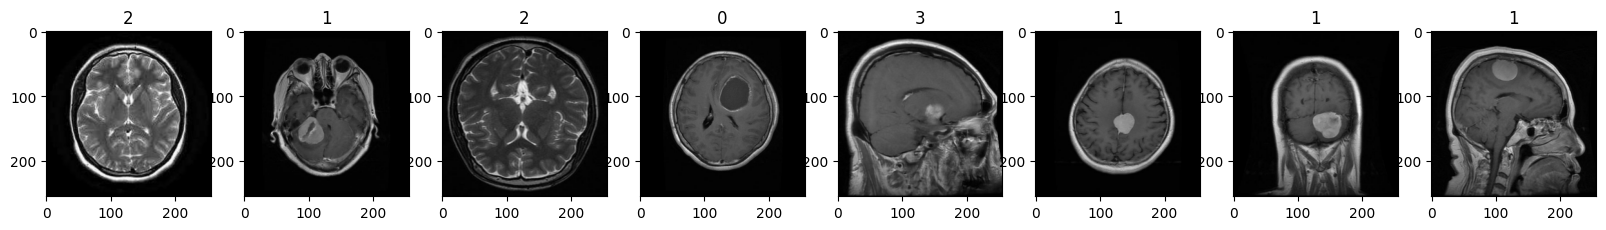

In [ ]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 16)        4

In [ ]:
model.compile ('adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs= 50, validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/50
154/154 [==============================] - 35s 206ms/step - loss: 0.7467 - accuracy: 0.6820 - val_loss: 0.4536 - val_accuracy: 0.8210
Epoch 2/50
154/154 [==============================] - 21s 137ms/step - loss: 0.3840 - accuracy: 0.8563 - val_loss: 0.3363 - val_accuracy: 0.8807
Epoch 3/50
154/154 [==============================] - 21s 137ms/step - loss: 0.2596 - accuracy: 0.9016 - val_loss: 0.2779 - val_accuracy: 0.8906
Epoch 4/50
154/154 [==============================] - 33s 213ms/step - loss: 0.1582 - accuracy: 0.9448 - val_loss: 0.2846 - val_accuracy: 0.8835
Epoch 5/50
154/154 [==============================] - 24s 155ms/step - loss: 0.1081 - accuracy: 0.9631 - val_loss: 0.2112 - val_accuracy: 0.9439
Epoch 6/50
154/154 [==============================] - 31s 203ms/step - loss: 0.0704 - accuracy: 0.9754 - val_loss: 0.3033 - val_accuracy: 0.9176
Epoch 7/50
154/154 [==============================] - 21s 135ms/step - loss: 0.0681 - accuracy: 0.9756 - val_loss: 0.3211 - val_ac

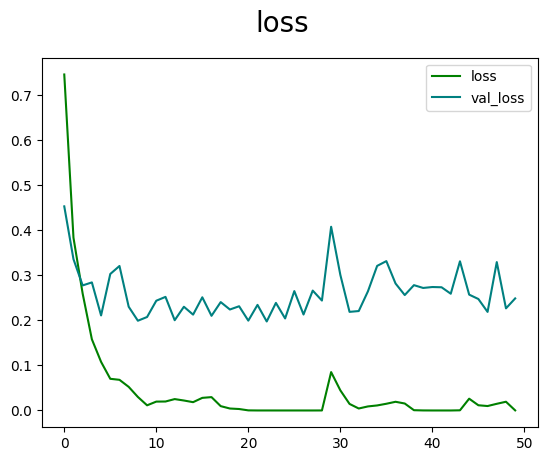

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='green',label='loss')
plt.plot(hist.history['val_loss'],color='teal',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper right")
plt.show()

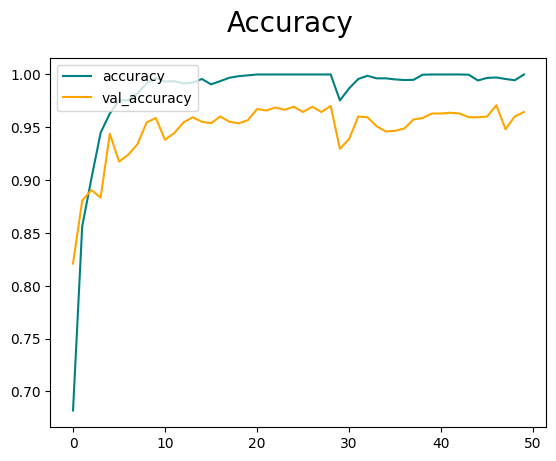

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat=model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)